In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.stats as stats

In [2]:
tbl = { 'Id' : [1,2,3,4,5],
'Y' : [2,6,7,9,15],
'X' : [1,4,5,6,9]
      }
tbl = pd.DataFrame(tbl)
tbl

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [3]:
import statsmodels.api as sm

In [4]:
x = tbl['X']
y = tbl['Y']

x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(modl2.summary())

C:\Users\amilk\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):            0.00122
Time:                        22:30:56   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

b0 =  -0.2882 and b1 = 1.6176

In [5]:
e = modl2.resid
print(e)

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64


In [6]:
np.std(e)

0.6048820983804831

## Parameter estimation by MLE

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [8]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0,len(x)):
        y_exp = m*x+b
    L = (len(x)/2*np.log(2*np.pi)+len(x)/2*np.log(sigma**2) + 1/ (2*sigma**2)*sum((y-y_exp)**2))
    return L

x = np.array([1,4,5,6,9])
y = np.array([2,6,7,9,15])
lik_model = minimize(lik, np.array([2,2,2]), method = 'L-BFGS-B')

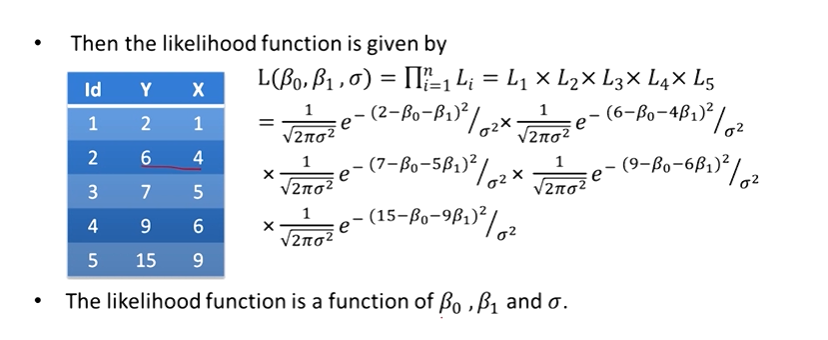

In [9]:
lik_model

      fun: 4.5810840727626125
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.38555834e-05, 1.24344979e-06, 1.00364161e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 104
      nit: 17
     njev: 26
   status: 0
  success: True
        x: array([ 1.61764713, -0.28823556,  0.60488246])

**Q** An Auto company periodically has a special week-long sale.As part of advertising campaign runs one or more television commercials during the weekend preceding the sale.

In [10]:
tbl = { 'TV Ads' : [1,3,2,1,3],
'car Sold' : [14,24,18,17,27]
      }
tbl = pd.DataFrame(tbl)
tbl

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [11]:
x = tbl['TV Ads']
y = tbl['car Sold']

x2 = sm.add_constant(x)
modl = sm.OLS(y,x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Wed, 23 Mar 2022   Prob (F-statistic):             0.0190
Time:                        22:30:59   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\amilk\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [12]:
e = modl2.resid
print(e)

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64


In [13]:
np.std(e)

1.6733200530681507

## Parameter estimation by MLE

In [14]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0,len(x)):
        y_exp = m*x+b
    L = (len(x)/2*np.log(2*np.pi)+len(x)/2*np.log(sigma**2) + 1/ (2*sigma**2)*sum((y-y_exp)**2))
    return L

x = np.array([1,3,2,1,3])
y = np.array([14,24,18,17,27])
lik_model = minimize(lik, np.array([2,2,2]), method = 'Nelder-Mead')

lik_model

 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

## LOGISTIC REGRESSION

### Example
- Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores.
- Simmons owns and operates a national chain of women’s apparel stores.
- Five thousand copies of an expensive four-color sales catalog have been printed, and each catalog includes a coupon that provides a `$50` discount on purchases of `$200` or more.
- The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.

Variable 
- Management thinks that annual spending at Simmons Stores and whether a customer has a Simmons credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon.
-  Simmons conducted a pilot study using a random sample of 50 Simmons
credit card customers and 50 other customers who do not have a
Simmons credit card.
- Simmons sent the catalog to each of the 100 customers selected.
- At the end of a test period, Simmons noted whether the customer used the coupon or not?

Explanation of Variables
- The amount each customer spent last year at Simmons is shown in thousands of dollars and the credit card information has been coded as 1 if the customer has a Simmons credit card and 0 if not.
- In the Coupon column, a 1 is recorded if the sampled customer used the coupon and 0 if not.

In [15]:
df = pd.read_excel('datasets/5_Simmons.xls')
df.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


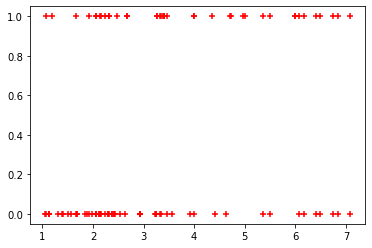

In [16]:
plt.scatter(df.Spending,df.Coupon,marker ='+',color = 'red')

In [17]:
x = df[['Card','Spending']]
y = df['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101    
Dependent Variable: Coupon           AIC:              126.9739 
Date:               2022-03-23 22:31 BIC:              134.7894 
No. Observations:   100              Log-Likelihood:   -60.487  
Df Model:           2                LL-Null:          -67.301  
Df Residuals:       97               LLR p-value:      0.0010981
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -2.1464    0.5772  -3.7183  0.0002  -3.2778  -1.0150
Card          1.0987    0.4447   2.4707  0.0135   0.2271   1.9703
Spending

In [18]:
import scipy
from scipy.stats import chi2

In [19]:
chi2.pdf(13.628,2)

0.000549145469075383